## Astro 304 "Galaxies"

### A model of galaxy formation: star formation and supernova feedback driven outflows

In [137]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### A simple model of galaxy formation

Let's recap the galaxy formation model we've been discussing. 

From considering a model for collapse of shells around a Gaussian peak of non-uniform density, we know how to compute the mass accretion history of halos into which these peaks collapse, $\dot{M}_{\rm h}$. What about baryons? In what follows we will consider a model similar to those presented in Krumholz & Dekel (2012) and Feldmann (2013). 

Let's assume that gas accretes *onto the galaxy* (i.e. already past halo) proportionally to $\dot{M}_{\rm h}$: 

$$\dot{M}_{\rm g, in} = \epsilon_{\rm in}\, f_{\rm g, in}\,  f_{\rm b} \, \dot{M}_{\rm h}, $$ 

where $\epsilon_{\rm in}$ is a function that will describe any process *internal* to the halo that suppresses accretion of gas onto galaxy relative to the accretion of gas onto halos (such as long cooling time, for example); $f_{\rm g,in}$ is a function describing any process *external* to the halo that suppresses accretion of gas onto the halo. $f_{\rm b}=\Omega_{\rm b}/\Omega_{\rm  m}$ is the universal baryon fraction for the cosmology within which galaxy formation is modelled. 



### Suppression of gas accretion onto small-mass halos and "filtering mass" 

Example of the process that can suppress gas accretion onto gaseous halos is heating by the cosmic UV background. 
The mathematical formalism describing effect of such re-heating on the evolution of perturbations is presented in <a href="http://adsabs.harvard.edu/abs/2000ApJ...542..535G">Gnedin (2000).</a> The quantitative effect on accretion of baryons on a collapsing peak is calibrated using
 numerical simulations of galaxy formation  (e.g., <a href="http://adsabs.harvard.edu/abs/2006MNRAS.371..401H">Hoeft et al 2006</a>, <a href="http://adsabs.harvard.edu/abs/2008MNRAS.390..920O">Okamoto et al 2008</a>). It predicts that baryon fractions in halos of mass $M$ at redshift $z$ is modified from a constant value $\bar{f}_{\rm b}$ as:

$$
 f_{\rm g,in}(M,z)=\bar{f}_{\rm b}\left\{1+(2^{\alpha/3}-1)\left[\frac{M}{M_{\rm c}(z)}\right]^{-\alpha}\right\}^{-3/\alpha},
$$
 
with $\alpha=2$. This function is just a "soft" step function around $M_{\rm c}$  changing from $0$ to $1$.

The cutoff mass $M_{\rm c}$ is derived from simulations of galaxy formation.
For example, $M_{\rm c}(z)$, in figures of <a href="http://adsabs.harvard.edu/abs/2008MNRAS.390..920O">Okamoto et al (2008)</a>
is well approximated by the following formula:

$$
    M_{\rm c}(z) = 6\times 10^9h^{-1}\ M_\odot\,\exp(-0.63z),\ \ \mathrm{for}\ z<9,
$$

while $M_{\rm c}$ can be assumed to be $\approx 10^5-10^6h^{-1}\ M_\odot$ at $z>9$, because temperature of the gas is much smaller before reionization.

### Simple model for suppression of accretion for massive halos due to long cooling times 

Previously (see ex12 notebook), we saw that we could capture the effects of hot halo buildup in halos of sufficiently high mass by modifying the model to track gas mass in gaseous halo, $M_{\rm gh}$, and accretion of mass onto galaxy ISM with rate, $M_{\rm gh}/t_{\rm cool}$, where $t_{\rm cool}$ is cooling time estimated at the density approximately equal to the *differential* density at the "virial" radius, $R_{200c}$. We saw that the model with such modification reproduces the $z=0$, $M_\star-M_h$ relation in massive halos. 

However, if the code with this modification is run, one can immediately see that additional ODE and calculation of $t_{\rm cool}$ slow down calculation considerably. To avoid such slow down we can use an approximate parametrization that captures this physical effect. Namely, given that $t_{\rm cool}$ sharply increases once halo mass becomes larger than some critical mass, by analogy with the equation for the filtering mass due to UV heating we can parameterize the suppression of accretion as 

$$
 \varepsilon_{\rm g,in}(M,z)=1-\left\{1+(2^{\alpha_2/3}-1)\left[\frac{M}{M_{\rm c,h}(z)}\right]^{-\alpha_2}\right\}^{-3/\alpha_2},
$$

where $M_{\rm c,h}(z)$ is the critical mass above which hot halo is maintained and accretion onto ISM is suppressed. 

We saw that at $z=0$, $M_{\rm c,h}(z=0)\approx 10^{12}\ M_\odot$ and we can figure out its redshift dependence by observing that the critical mass at different $z$ is determined by the condition that $t_{\rm cool}=t_{\rm U}(z)$. 

Cooling time scales as

$$t_{\rm cool}\propto \rho_{\rm c}^{-1}\frac{M_{200c}}{R_{200c}}\propto\rho_{\rm c}^{-2/3}(z) M^{2/3}_{200c},$$

where I used the fact that $R_{200c}=(3M_{200c}/[800\pi\rho_c(z)])^{1/3}.$

Age of the universe over most of the redshift range scales as $t_{\rm U}\propto 1/H(z)\propto \rho_{\rm c}^{-1/2}$ (recall that $\rho_{\rm c}(z)=3H^2(z)/(8\pi G)$). Thus, condition $t_{\rm cool}=t_{\rm U}$ implies scaling of critical mass 

$$M_{\rm c,h}(z)\propto \left(\rho_{\rm c}^{2/3}\,\rho_{\rm c}^{-1/2}\right)^{3/2}\propto \rho_{\rm c}(z)^{1/4}\propto E(z)^{1/2} = M_{\rm c,h0}\,E(z)^{1/2}. $$

The left olot below shows calculation of the model with $\alpha_2 = 0.5$ and mass scale $M_{\rm c,h0}=3\times 10^{11}\ M_\odot$, while plot on the right shows the results of the actual calculation of model tracking $M_{\rm gh}$ from ex12 notebook. Comparison of the plots shows that we reproduce results of the direct model quite closely.

### $M_\star-M_{\rm h}$ relation with the model of gas accretion suppression due to build up of  hot halo above certain $M_{\rm h}=M_{\rm c, h}$. 

<table><tr><td><img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mhms_Mhotonly.png" align="center" width="350"></img></td><td><img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mhms_Mhotonly_ex.png" align="center" width="350"></img></td></tr></table>

### Star formation, gas recycling, and wind outflow

Gas in the galaxy's interstellar medium (ISM) is converted into stars at the star formation rate (SFR), $\dot{M}_\star$, and ODE describing its evolution is thus:

$$
\dot{M}_{\rm g} = \dot{M}_{\rm g, in} - (1-\mathcal{R}+\eta)\, \dot{M}_{\star},
$$

where $\mathcal{R}$ is the fraction of the stellar mass of a single stellar population that is recycled to the ISM via stellar winds and shedding of envelopes by stars in the asymptotic giant branch (AGB) phase of evolution.

$\eta$ is outflow (aka wind) *mass loading factor*. It parametrizes the mass rate of outflow of ISM gas in units of star formation rate due to injection of momentum and energy by young massive star winds and supernovae explosions. These processes are collectively called *stellar feedback.* Given that the feedback is due to young stars, it makes sense to parametrize its effects on ejection of gas in units of star formation rate, as effects should scale with the rate of young star/SN formation and thus SFR. 

### Star formation model

The simplest model 

$$\dot{M}_\star =\frac{M_{\rm g}}{\tau_{\rm sf}}.$$

Observations indicate $\tau_{\rm sf}$ of several Gyrs. 

For example, the SFR of the Milky Way is $\dot{M}_\star \sim 1-2\ M_\odot/\mathrm{yr}$, while its gas mass is $M_{\rm g} \sim 10^{10}\ M_\odot$. Thus, the time scale at which the Galaxy would deplete its gas while forming stars at the current rate is $\tau_{\rm sf} \sim 5-10$ Gyrs. 

The depletion time scales of a population of normal star-forming galaxies are comparable and span a range of $\sim 2-10$ Gyrs (e.g., Kennicutt 1998; Bigiel et al. 2008). 

### Kennicutt-Schmidt relation

Relation between gas surface density (HI+H2 with corrections for Helium and ionized gas) and star formation rate surface density: 

$$ \dot{\Sigma}_\star = \frac{\Sigma_{\rm gas}}{\tau_{\rm sf}}.$$

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/KS_bigiel08.png" align="center" width="400"></img>

### Maarten Schmidt and Rob Kennicutt

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/schmidt_kennicutt_photo.PNG" align="center" width="800"></img>

### Observational estimates of gas and star formation surface densities

The figure from a review on observational facts about star formation in galaxies by <a href="http://adsabs.harvard.edu/abs/2012ARA%26A..50..531K">Evans & Kennicutt (2012)</a>. Star formation rate in observations is estimated from indicators such as IR and H$\alpha$ luminosity, while mass of atomic and molecular gas is estimated from fluxes of 21 cm emission (HI) and molecular transition lines of molecules, such as CO (H$_2$). 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/gas_sfr_estimates_KE12.png" align="center" width="600"></img>

### Depletion time of molecular hydrogen

$$\tau_{\rm H_2}=\frac{M_{\rm H_2}}{\dot{M}_\star}\ \mathrm{or}\ =\frac{\Sigma_{\rm H_2}}{\dot{\Sigma}_\star}\sim 1-3\rm\ Gyrs.$$

(e.g., Kennicutt 1998, Wong & Blitz 2002, Bigiel et al. 2008, Leroy etal. 2013). 

Observations show that $\tau_{\rm sf}$ varies with $M_\star$, $M_{\rm g}$, and local gas and star surface density, while $\tau_{\rm H_2}$ is roughly constant (i.e., very weakly dependent on galaxy properties and surface density). It is thus advantageous to base one's model of gas conversion into stars on molecular mass, $M_{\rm H_2}$ and molecular gas depletion time $\tau_{\rm H_2}$. 


<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/tau_H2.png" align="center" width="600"></img>

### Physics of star formation

is complex and is not yet fully understood. However, we know from observations that stars form in dense, cold, molecular gas. It makes sense: these are regions where the Jeans mass is the smallest. 

Why, however, $\tau_{\rm H_2}$ is so long? The answer was not understood until recently. Now, however, it is clear that the gas depletion time scale is long due to a combination of two factors (see <a href="http://adsabs.harvard.edu/abs/2017arXiv170404239S">Semenov et al. 2017</a>): 

1) star formation in molecular clouds is inefficient because gas is turbulent and only a small fraction of it reaches conditions for gravitational collapse at any given time.

2) lifetime of star-forming molecular regions is limited to $\sim 10-30$ Myr by energy and momentum injection from young stars, which disperse their parent cloud. The gas not converted into stars then spends few tens of Myrs waiting until it reaches conditions conducive for star formation again.

The cycles into and out of star-forming state stretch the time a typical atom in the ISM has to wait until it is incorporated into stars to Gyrs. 

### Model for molecular hydrogen

Molecular hydrogen forms in the cold gas, which can self-shield against ambient far UV radiation from stars, which dissociates molecules. Self-shielding occurs both due to absorption of FUV photons by H$_2$ molecules themselves and by dust particles. The latter induces scaling of H$_2$ fraction with metallicity. 

If we have a model for disk size, $R_{\rm d}$ and if we assume exponential disk surface density, 
$\Sigma_{\rm g}(R)=\Sigma_0\,\exp(-R/R_{\rm d})$, we know surface density of gas at all radii. 

We can then compute the H$_2$ surface density $\Sigma_{\rm H_2}=f_{\rm H_2}\Sigma_{\rm g}$ following Krumholz, McKee & Tumlinson (2008, 2009):
$$
f_{\rm H_2}(\Sigma_{\rm g},Z) = 1 -  \frac{0.75 s}{1+0.25 s},\ \mathrm{if}\ s\leq 2,$$
while $f_{\rm H_2}=0$ otherwise. Here $Z=M_Z/M_{\rm g}$ is gas metallicity, and parameter $s$ is

$$
s=\frac{\ln( 1 + 0.6\chi + 0.01\chi^2)}{0.6 \tau_c}$$

$$\chi = \frac{3.1}{4.1}\left(1+3.1 (Z/Z_\odot)^{0.365} \right)$$

$$\tau_c =320\, c\, \frac{\Sigma_{\rm g}}{{\rm g}\, {\rm cm}^{-2}} Z/Z_\odot,\,c=5. $$


### Does it matter?

if we model star formation as 
$$\dot{M}_\star =\frac{M_{\rm g}}{\tau_{\rm sf}}\ \ \mathrm{or}\ \ \dot{M}_\star =\frac{M_{\rm H_2}}{\tau_{\rm H_2, sf}},$$

will it result in different evolution of stellar masses of galaxies and $M_\star-M_{\rm h}$ relation? 
You should get the answer as part of HW5. 

### Wind outflows

Energy and momentum injection by supernovae feedback is thought to drive powerful winds from galaxies. 
This process, however, is still not fully understood both theoretically and observationally and exploration of the physical processes that drive winds is a subject of active ongoing research. 
However, we do have some idea of how winds should arise and how they should scale with halo/galaxy properties.

Recent simulations of galaxy formation have started to calibrate the mass loading factor $\epsilon_{\rm out}$. In particular, <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015)</a> report that the loading factor has simple scaling with stellar mass in their simulations: $\eta=3.6M_{*,10}^{-0.35}$ where $M_{*,10}$ is galaxy current stellar mass in units of $10^{10}\ M_\odot$ (see their Fig. 6 and eq. 8). 

Note, however, that most of the simulations are for galaxies of $M_\star<5\times 10^9\ M_\odot$. 

### Wind outflows cont'd

Although $\epsilon_{\rm out}=3.6M_{*,10}^{-0.35}$ is a fit to simulation results  <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015)</a>, we can understand its basic scaling as follows.

The rate with which young stars inject energy into ISM is $\dot{E}_{\rm SN}\propto \dot{M}_\star$. 
Suppose that it is this injected energy that unbinds the gas and drives in an outflow. The assumption that energy injection (as opposed to momentum kicks) drives the gas results in *energy-driven wind model*. 

The energy injected by supernova into ISM of galaxies is $E_{\rm SN}\simeq\epsilon_{\rm SN}\nu_{\rm SN} M_\star$ (true for a fixed initial mass function, IMF), where $\epsilon_{\rm SN}$ is the energy per supernova that is transferred to the ISM after radiative losses during expansion stage of the remnant bubbles, $\nu_{\rm SN}$ is the number of supernovae per solar mass of stars, which is $\nu_{\rm SN}\approx 0.01-0.02$ for normal stellar populations. Computer simulations of the supernovae remnants (e.g., <a href="http://adsabs.harvard.edu/abs/2015ApJ...802...99K">Kimm & Ostriker 2015</a>, <a href="http://adsabs.harvard.edu/abs/2015MNRAS.450..504M">Martizzi et al 2015</a>) show that $\epsilon_{\rm SN}\sim 10^{49}$ ergs, i.e., about 1 per cent of the original explosion energy remains after cooling losses.


### Wind outflows cont'd

Suppose that this energy injection is efficient in unbinding the gas and driving it out, which means that 

$$\dot{E}_{\rm SN}\propto\dot{M}_\star\propto \dot{M}_{\rm g, out}V^2_{\rm out}$$

The outflow velocity, $V_{\rm out}$, will be determined by the mass of ISM gas into which supernova energy is deposited and can fluctuate. However, one can make an argument that when winds are capable of driving the gas out of potential well of the system, *on average* it should be of order of escape velocity, $V_{\rm esc}=\sqrt{-2\Phi}=\sqrt{2} V_{\rm circ}\propto M_{\rm h}/R_{\rm h}$, i.e. 

$$\dot{E}_{\rm SN}\propto \dot{M}_{\rm g, out} \frac{M_{\rm h}}{R_{\rm h}}\propto \dot{M}_{\rm g, out}\, M^{2/3}_{\rm h},$$

where we use the fact that mass and radius of the halo are related by definition of the radius: $M_{\rm h}\propto R_h^3$. 

Why can we assume $V_{\rm out}\sim V_{\rm esc}$ on average? After all, supernovae energy injection does not have to "know" or "respect" the halo binding energy. The main reason is that if energy injection rate is much smaller than binding energy, the gas will accumulate and SFR will increase, while if it is much larger than the binding energy, ISM gas will be driven quickly in the wind. Thus, on average the galaxy should evolve with driving winds with energy close to the halo binding energy. 

With this key assumption we have

$$\eta=\frac{\dot{M}_{\rm g, out}}{\dot{M}_\star}\propto M_{\rm h}^{-2/3}.$$

Likewise, throughout the evolution efficient wind driving implies: $M_\star\propto E_{\rm SN}\simeq M_{\rm g,tot}\,V^2_{\rm out}$, where $M_{\rm g,tot}\propto M_{\rm h}$ is the gas mass that was accreted onto galaxy throughout its evolution. 

Thus, 

$$M_\star\propto M_{\rm h}V^2_{\rm out}\propto M_{\rm h}\frac{M_{\rm h}}{R_{\rm h}}\propto M_{\rm h}\,M_{\rm h}^{2/3}\propto M_{\rm h}^{5/3}$$

and so the mass loading factor should scale as 

$$\eta\propto M_{\rm h}^{-2/3}\propto M_\star^{-2/5}\propto M_\star^{-0.4},$$

which is quite close to the scaling $\eta\propto M_{\star}^{-0.35}$ measured in simulations by <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015).</a> 

Given that this scaling was derived assuming that feedback imparts *energy* required for unbinding the gas (this energy can be in the form of kinetic energy or thermal energy - the form of energy does not matter), the scaling is called *the energy-driven wind solution.*

### Momentum-driven wind scaling

We can use a similar argument, but assume that gas escapes because it acquired momentum (injected by young stars via winds and supernova remnants) that corresponds to velocity larger than escape velocity from the potential: 

$$\dot{p}_{\rm SN}\propto\dot{M}_\star\propto \dot{M}_{\rm g, out}V\propto \dot{M}_{\rm g, out} \left(\frac{M_{\rm h}}{R_{\rm h}}\right)^{1/2}\propto \dot{M}_{\rm g, out}\, M^{1/3}_{\rm h},$$

where $V$ is now escape velocity, $V=\sqrt{-2\Phi}=\sqrt{2GM/R}$, which measures the depth of the potential out of which gas has to climb out, and $M_{\rm h}\propto R_h^3$ are the halo mass and radius. Thus, 

$$\eta=\frac{\dot{M}_{\rm g, out}}{\dot{M}_\star}\propto M_{\rm h}^{-1/3}.$$

Likewise, throughout the evolution efficient wind driving implies: $M_\star\propto p_{\rm SN}\simeq M_{\rm g}\,V$, where $M_{\rm g}\propto M_{\rm h}$ is the gas mass that was accreted onto galaxy throughout its evolution. 

Then, $\chi=M_\star/M_{\rm g}\propto V\propto \sqrt{M_{\rm h}/R_{\rm h}}\propto M^{1/3}_{\rm h}\propto \chi^{-1/3}M_\star^{1/3}$ and thus $\chi\propto M_\star^{1/4}$. The relation between stellar mass and halo mass is thus:
$$
M_\star\propto M^{4/3}\propto M^{1.33}.
$$
and so the mass loading factor should scale as 

$$\eta\propto M_{\rm h}^{-1/3}\propto M_\star^{-1/4}\propto M_\star^{-0.25},$$

i.e., shallower than in the energy-driven wind model. 

### Energy- and momentum-driven wind models vs observed $M_\star-M_{\rm halo}$ relation

<img width="400" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mhms_wind_models.png"></img>

### Effect of outflows on the $M_\star-M_{\rm halo}$ relation

We can keep going and try to design  $\eta$ that will give us a very good match to the AM relation at all masses. There is some rationale to this. FIRE galaxy formation simulations suite of <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015)</a> only simulated systems with $M_{\rm halo}\leq 2\times 10^{12}\ M_\odot$ and $M_\star\leq 3\times 10^{10}\ M_\odot$. Most of the largest $M_\star$ did not have a detectable outflow (which is represented by upper limits in their figures). Thus, $\eta$ may decrease faster than implied by the M15 fit at large stellar masses.  

The following mass loading factor dependence may approximate it 
$$\eta=\max(0,3.6M_{*,10}^{-0.35}-4.6).$$

Here is comparison of no outflow model (left) to model with such outflow model (right). In both cases the models include suppression of accretion at large masses due to large cooling time at the virial radius and (assumed) heating by supernovae and AGN feedback at small radii. Star formation in both cases is based on molecular gas mass. 

The match now is quite good, although we see that there is some difficulty in making the change of slope of the relation around $M_{\rm halo}\approx 10^{12}\ M_\odot$ to be as sharp as in observations. 

<table><tr><td><img width="400" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mhms_Mhotonly.png"></img></td>
<td><img width="400" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mhms_heatingonly2.png"></img></tr></td></table>

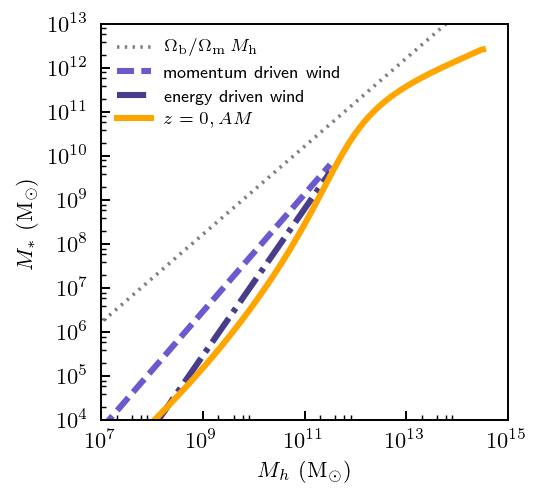

In [168]:
#
# plot
#
from code.setup.setup import data_home_dir

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
zdata=0.
lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

lMhscale = np.linspace(7., 11.5, 50); Mhscale = 10.**lMhscale

Msscale_m = 3.e10 * (Mhscale/1.e12)**(4./3.)
Msscale_e = 3.e10 * (Mhscale/1.e12)**(5./3.)

plt.plot(Mhscale, Msscale_m, '--', c='slateblue', lw=2.5, 
         label=r'momentum driven wind')
plt.plot(Mhscale, Msscale_e, '-.', c='darkslateblue', lw=2.5, 
         label=r'energy driven wind')

# load the z=0 M*-Mvir relation derived from AM in hw4

mhs, msmh = np.loadtxt(data_home_dir()+'mhmsz0.dat', usecols=(0,1), unpack=True)
plt.plot(mhs, msmh, c='orange', lw=2.5, label=r'$z=0, AM$')

plt.legend(frameon=False, loc='upper left', fontsize=7)
#plt.grid(linestyle='dotted', c='lightgray')

plt.savefig('fig/mhms_wind_models.png',bbox_inches='tight')
plt.show()


### implementing the gas accretion suppresion for M>Mhot in galaxy model

The following code implements approximate model that mimics model in which accretion onto ISM is given by $M_{\rm gh}/t_{\rm cool}$ without actually tracking $M_{\rm gh}$ or computing $t_{\rm cool}$. 

In [35]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo) 


In [164]:
# import numpy as np
import code.galaxy_model as gm
from colossus.cosmology import cosmology
from scipy.integrate import odeint

cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    
# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    


from colossus.lss import peaks
# inherit class for this homework from the base model_galaxy class
# add the required functions to it
class gmodel_heating(gm.model_galaxy):
    def __init__(self, *args, **kwargs):
        super(gmodel_heating, self).__init__(*args, **kwargs)
        return

    def Mhot(self,z):
        # the factor in front is adjusted to reproduce results of actual calculations with tcool
        # the redshift scaling follows from tcool(z)~t_age(z) requirement
        mhot = 3.e11 * (self.cosmo.rho_c(z)/ self.cosmo.rho_c(0))**(0.25)
        return mhot
       
    def UV_cutoff(self, z):
        """
        approximation to the cutoff mass in Fig 3 of Okamoto, Gao & Theuns 2008
        the output is mass in /h Msun. 
        """
        dummy = np.zeros_like(z)
        dummy[z>9] = 1.e6
        dummy[z<=9] = 6.e9*np.exp(-0.63*z[z<9]) # expression from Nick
        return  1.0/(1.0+(2.**(2./3.)-1.)*(dummy/self.Mh)**2)**(1.5)

    def Mg_in(self, t):
        dummy = self.fbuni*self.fg_in(t)*self.eps_in(t)*self.dMhdt(self.Mh,t)
        return dummy

    def Ms_in(self, t):
        dummy = 0.0
        return dummy

    def fg_in(self,t):
        zd = self.cosmo.age(t, inverse=True)
        # here I implement soft suppression of baryon fraction, as seen in simulation (eq 2.2 in the notes)
        # results are qualitatively the same, but this function makes suppression a "softer" as a function of M
        return 1.0 #self.UV_cutoff(zd)
    
    def eps_in(self, t):
        zd = self.cosmo.age(t, inverse=True)
        alfa = 0.5
        epsin = 1.0 - 1.0/(1.0+(2.**(alfa/3.)-1.)*(self.Mhot(zd)/self.Mh)**alfa)**(3./alfa)
        return epsin


In [165]:
from scipy.interpolate import interp2d

sfrmodel = 'gaslinear'
# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print("evolving halo of log10(Mh)=%2.2f ..."%(lMh[j]))
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gmodel_heating(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, 
                       tausf=2.0, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')


evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


In [13]:
# read in M*-Mh relation derived in hw4

mhs, msmh = np.loadtxt(data_home_dir()+'mhmsz0.dat', usecols=(0,1), unpack=True)


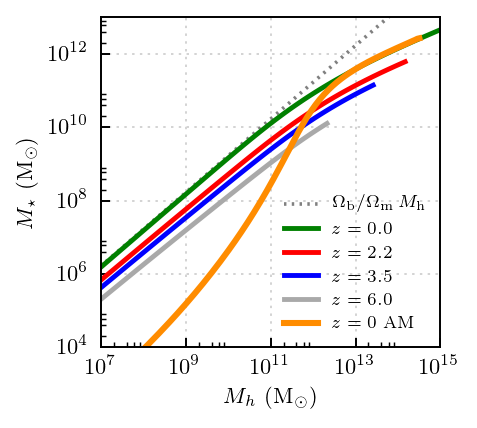

In [166]:
#
# plot
#
from code.setup.setup import data_home_dir

fig = plt.figure(figsize=(2.5, 2.5))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{\star}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')

lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=2.0, label=r'$z=%1.1f$'%zplot)

zdata=0.
plt.plot(mhs, msmh, c='darkorange', lw=2.5, label=r'$z=0\ \rm AM$')

plt.legend(frameon=False,loc='lower right', fontsize=7)
plt.grid(linestyle='dotted', c='lightgray')
plt.savefig('fig/mhms_Mhotonly.png',bbox_inches='tight')
plt.show()